In [1]:
%run ../src/start.py


python	3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
---------------------
Versions:
----------------------
pandas      1.1.2
numpy       1.19.1
matplotlib  3.3.1
seaborn     0.11.0
plotly      4.11.0
----------------------


Loaded Libraries
-------------------
import pandas as pd
import numpy as np
import sys,os
import re
import glob
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
----------------


GLOBAL VARIABLES
--------------------------
HERE_DIR: list current directory path
RAW_DIR: list files in `data\raw` directory
INTER_DIR: list files in `data\interim` directory
FINAL_DIR: list files in `data\final` directory
SRC_DIR: list files in `src\` directory
------------------------------

# SAVE PLOTS
To save a plot call
`save_plots(fig_variable,'name_of_plot')`

source file: src/start.py




In [2]:
ls ../data/raw/crime_data/2011/csv

apr11.xlsx*  dec11.xlsx*  jan11.xlsx*  jun11.xlsx*  may11.xlsx*  oct11.xlsx*
aug11.xlsx*  feb11.xlsx*  jul11.xlsx*  mar11.xlsx*  nov11.xlsx*  sep11.xlsx*


In [3]:
path = '2011/csv'
raw_directory = os.path.join('..','data','raw','crime_data',f'{path}/')

In [4]:
all_files = glob.glob(os.path.join(raw_directory, "*.xlsx")) # change "*.xlsx" for excel files
df_from_each_file = (pd.read_excel(f, engine='openpyxl') for f in all_files)    # change to `pd.read_excel(f)` for excel files
df   = pd.concat(df_from_each_file, ignore_index=True)     # combine into one large dataframe

# cleanup columns
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('\n','_').str.strip()
# df.columns = df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127659 entries, 0 to 127658
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           127659 non-null  datetime64[ns]
 1   hour           127659 non-null  int64         
 2   offense_type   127659 non-null  object        
 3   beat           127659 non-null  object        
 4   premise        127659 non-null  object        
 5   block_range    127659 non-null  object        
 6   street_name    127659 non-null  object        
 7   type           127659 non-null  object        
 8   suffix         127659 non-null  object        
 9   ._of_offenses  127659 non-null  int64         
 10  field11        0 non-null       float64       
 11  field12        0 non-null       float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 11.7+ MB


# Show null data

In [6]:
df.apply(lambda x: sum(x.isnull()))

date                  0
hour                  0
offense_type          0
beat                  0
premise               0
block_range           0
street_name           0
type                  0
suffix                0
._of_offenses         0
field11          127659
field12          127659
dtype: int64

In [7]:
# create null percentage of column as dataframe
null_per_df = pd.DataFrame(df.isna().mean().round(4) * 100)
# rename columns
null_per_df.rename(columns={'index': 'col_name', 0: 'null_percent'}, inplace=True)

# filter data <20% null values
per_filter = null_per_df.null_percent<=90
null_per_df[per_filter].sort_values(by='null_percent',ascending=False)

,null_percent
date,0.0
hour,0.0
offense_type,0.0
beat,0.0
premise,0.0
block_range,0.0
street_name,0.0
type,0.0
suffix,0.0
._of_offenses,0.0


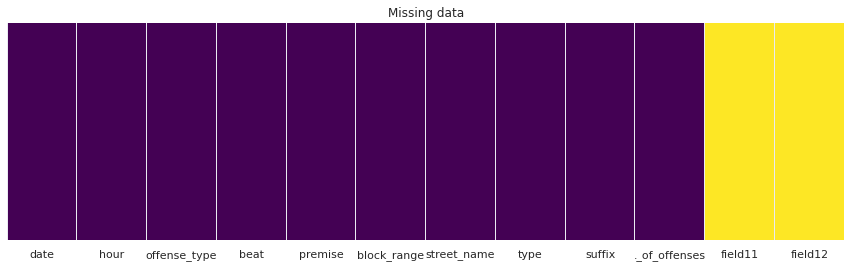

In [8]:
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing data')
plt.show()

In [9]:
df.columns.tolist()

['date',
 'hour',
 'offense_type',
 'beat',
 'premise',
 'block_range',
 'street_name',
 'type',
 'suffix',
 '._of_offenses',
 'field11',
 'field12']

In [10]:
# # combine columns into a new one
# df['offenses'] = pd.concat([df['. Of Offenses'].dropna(),
#                               df['. of Offenses'].dropna()]).reindex_like(df)

# # drop columns
# df = df.drop(['. Of Offenses','. of Offenses', 'Field11',
#  'Field12',
#  'Field13'], axis = 1)

In [11]:
df = df.drop([ 'field11','field12'], axis = 1)

In [12]:
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('\n','_').str.strip()

In [13]:
df.apply(lambda x: sum(x.isnull()))

date             0
hour             0
offense_type     0
beat             0
premise          0
block_range      0
street_name      0
type             0
suffix           0
._of_offenses    0
dtype: int64

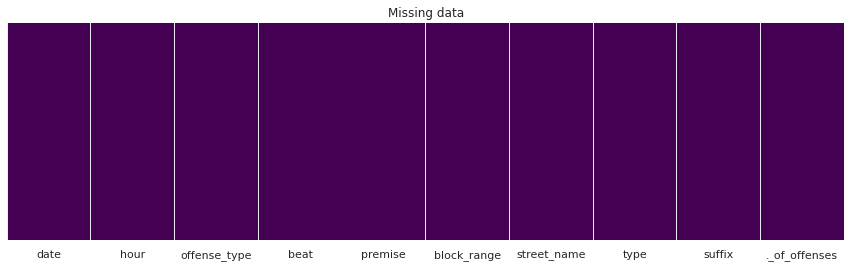

In [14]:
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing data')
plt.show()

In [15]:
df.head()

,date,hour,offense_type,beat,premise,block_range,street_name,type,suffix,._of_offenses
0,2011-04-13,1,Murder,17E40,20A,6400-6499,BANKSIDE,DR,-,1
1,2011-04-06,14,Murder,20G30,20A,2900-2999,HAYES,RD,-,1
2,2011-01-10,19,Murder,13D20,20R,8400-8499,GLENSCOT,-,-,1
3,2011-04-03,23,Murder,19G50,18N,10700-10799,BELLFORT,ST,W,1
4,2011-04-17,23,Murder,11H20,20A,2500-2599,BROADWAY,ST,-,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127659 entries, 0 to 127658
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           127659 non-null  datetime64[ns]
 1   hour           127659 non-null  int64         
 2   offense_type   127659 non-null  object        
 3   beat           127659 non-null  object        
 4   premise        127659 non-null  object        
 5   block_range    127659 non-null  object        
 6   street_name    127659 non-null  object        
 7   type           127659 non-null  object        
 8   suffix         127659 non-null  object        
 9   ._of_offenses  127659 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.7+ MB


## Combine date & hour to one column

In [17]:
df[['date','hour']]

,date,hour
0,2011-04-13,1
1,2011-04-06,14
2,2011-01-10,19
3,2011-04-03,23
4,2011-04-17,23
...,...,...
127654,2011-09-30,17
127655,2011-09-30,22
127656,2011-09-30,23
127657,2011-09-30,23


In [18]:
# convert two columns into one datetime
df['date_time'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['hour'], unit='h')

# drop columns
df = df.drop(['date','hour'], axis = 1)

In [19]:
df.head()

,offense_type,beat,premise,block_range,street_name,type,suffix,._of_offenses,date_time
0,Murder,17E40,20A,6400-6499,BANKSIDE,DR,-,1,2011-04-13 01:00:00
1,Murder,20G30,20A,2900-2999,HAYES,RD,-,1,2011-04-06 14:00:00
2,Murder,13D20,20R,8400-8499,GLENSCOT,-,-,1,2011-01-10 19:00:00
3,Murder,19G50,18N,10700-10799,BELLFORT,ST,W,1,2011-04-03 23:00:00
4,Murder,11H20,20A,2500-2599,BROADWAY,ST,-,1,2011-04-17 23:00:00


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127659 entries, 0 to 127658
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   offense_type   127659 non-null  object        
 1   beat           127659 non-null  object        
 2   premise        127659 non-null  object        
 3   block_range    127659 non-null  object        
 4   street_name    127659 non-null  object        
 5   type           127659 non-null  object        
 6   suffix         127659 non-null  object        
 7   ._of_offenses  127659 non-null  int64         
 8   date_time      127659 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 8.8+ MB


In [21]:
#change column name

df.rename(columns={
    '._of_offenses': 'offenses',
}, inplace=True)

# convert offenses to int

df['offenses'] = df['offenses'].astype('int64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127659 entries, 0 to 127658
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   offense_type  127659 non-null  object        
 1   beat          127659 non-null  object        
 2   premise       127659 non-null  object        
 3   block_range   127659 non-null  object        
 4   street_name   127659 non-null  object        
 5   type          127659 non-null  object        
 6   suffix        127659 non-null  object        
 7   offenses      127659 non-null  int64         
 8   date_time     127659 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 8.8+ MB


In [23]:
df.date_time

0        2011-04-13 01:00:00
1        2011-04-06 14:00:00
2        2011-01-10 19:00:00
3        2011-04-03 23:00:00
4        2011-04-17 23:00:00
                 ...        
127654   2011-09-30 17:00:00
127655   2011-09-30 22:00:00
127656   2011-09-30 23:00:00
127657   2011-09-30 23:00:00
127658   2011-09-30 21:00:00
Name: date_time, Length: 127659, dtype: datetime64[ns]

# Inspect evry column

In [ ]:
def create_new_cell(contents):
    '''created new jupyter cells by inputing a list of columns
    outputs'''
    from IPython.core.getipython import get_ipython
    shell = get_ipython()
    payload = dict(
        source='set_next_input',
        #text=f'#column:{contents}\ndf.{contents}.value_counts(dropna=False)[:10]'.format(contents),
        text=f'# column:{contents}\ndf.{contents}.value_counts(dropna=False)[:10]',
        replace=False,)
    shell.payload_manager.write_payload(payload, single=False)

    
def strip_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df.col = df[col].str.strip()
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))    
    
def lower_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df.col = df[col].str.lower()
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))       
    
    
    
def capital_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df.col = df[col].str.capitalize()
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))      

In [ ]:
col_list = df.columns.tolist()
col_list

In [ ]:
for col in col_list:
    create_new_cell(col)

In [ ]:
# column:date_time
df.date_time.value_counts(dropna=False)[:10]

In [ ]:
# column:offenses
df.offenses.value_counts(dropna=False)[:10]

In [ ]:
# column:suffix
df.suffix.value_counts(dropna=False)[:10]

In [ ]:
# column:type
df.type.value_counts(dropna=False)[:10]

In [ ]:
# column:street_name
df.street_name.value_counts(dropna=False)[:10]

In [ ]:
# column:block_range
df.block_range.value_counts(dropna=False)[:10]

In [ ]:
# column:premise
df.premise.value_counts(dropna=False)[:10]

In [ ]:
# column:beat
df.beat.value_counts(dropna=False)[:10]

In [ ]:
# column:offense_type
df.offense_type.value_counts(dropna=False)[:10]

In [ ]:
df.head()

In [ ]:
df.info()

In [24]:
col_ord =['date_time','offenses','offense_type', 'block_range', 'street_name', 'type', 'suffix','beat', 'premise']
df = df[col_ord]



file = 'crime_2011.csv'
directory_save = os.path.join('..','data','interim',f'{file}')
df.to_csv(directory_save,index=False)

In [25]:
df

,date_time,offenses,offense_type,block_range,street_name,type,suffix,beat,premise
0,2011-04-13 01:00:00,1,Murder,6400-6499,BANKSIDE,DR,-,17E40,20A
1,2011-04-06 14:00:00,1,Murder,2900-2999,HAYES,RD,-,20G30,20A
2,2011-01-10 19:00:00,1,Murder,8400-8499,GLENSCOT,-,-,13D20,20R
3,2011-04-03 23:00:00,1,Murder,10700-10799,BELLFORT,ST,W,19G50,18N
4,2011-04-17 23:00:00,1,Murder,2500-2599,BROADWAY,ST,-,11H20,20A
...,...,...,...,...,...,...,...,...,...
127654,2011-09-30 17:00:00,1,Theft,11300-11399,KATY,FWY,-,20G50,18R
127655,2011-09-30 22:00:00,1,Theft,18100-18199,GULF,FWY SER,E,12D70,18T
127656,2011-09-30 23:00:00,1,Theft,1500-1599,NORTH LP W,-,-,2A60,070
127657,2011-09-30 23:00:00,1,Theft,900-999,CORDELL,ST,-,2A20,070
